# Introducting P values

## P values are not very reproducible

In the following simulation, multiple data sets are randomly sampled from the same populations. 10 data points are sampled from Gaussians distributions with an SD = 5.0, and the population means differ by 5.0.

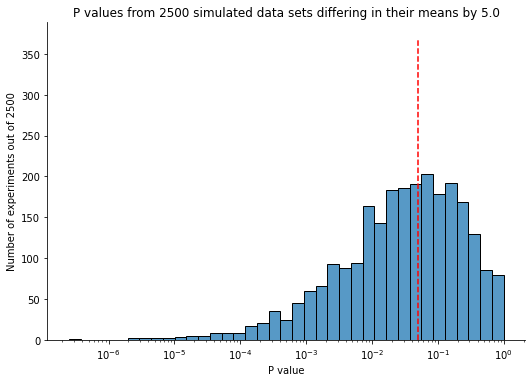

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(111)

mean= 10
SD  = 5
N   = 10

p_values = []

for _ in range(2500):
    pop_1 = np.random.normal(loc=mean,   scale=SD, size=N)
    pop_2 = np.random.normal(loc=mean+5, scale=SD, size=N)

    stat, p_value = stats.ttest_ind(pop_1, pop_2)
    p_values.append(p_value)

sns.displot(p_values, log_scale=True, aspect=1.5)
plt.vlines(.05, 0, 370, colors='r', linestyles='dashed')
plt.xlabel("P value")
plt.ylabel("Number of experiments out of 2500")
plt.title("P values from 2500 simulated data sets differing in their means by 5.0");


In [2]:
np.percentile(p_values, [2.5, 97.5])

array([1.69152124e-04, 7.02604441e-01])

The middle 95% of the P value range from 0.000169 to 0.7026, a span covering more than three orders of magnitude!

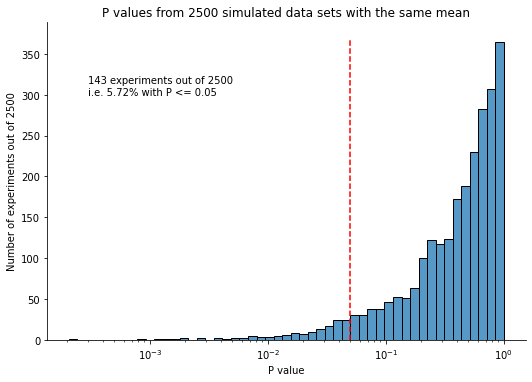

In [3]:
mean = 10
SD   = 5
N    = 10

p_values = []

for _ in range(2500):
    pop_1 = np.random.normal(loc=mean,   scale=SD, size=N)
    pop_2 = np.random.normal(loc=mean+0, scale=SD, size=N)

    stat, p_value = stats.ttest_ind(pop_1, pop_2)
    p_values.append(p_value)

sns.displot(p_values, log_scale=True, aspect=1.5)
plt.vlines(.05, 0, 370, colors='r', linestyles='dashed')
plt.xlabel("P value")
plt.ylabel("Number of experiments out of 2500")
signif = sum(np.array(p_values)<=0.05)
plt.text(x=0.0003, y=300, s=f"{signif} experiments out of 2500 \ni.e. {100 * signif / 2500}% with P <= 0.05")
plt.title("P values from 2500 simulated data sets with the same mean");

## Cumulative P values and ad hoc sample size decisions

Here we simulate the cumulative influence of the addition of samples to the previous set on the P value. The two populations are from a Gaussian distribution with the same mean and SD.

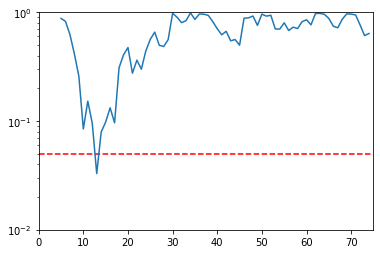

In [14]:
np.random.seed(111)
mean = 0
SD   = 1
N    = 75

pop_1 = np.random.normal(loc=mean, scale=SD, size=N)
pop_2 = np.random.normal(loc=mean, scale=SD, size=N)

p_values = []

for _ in range(5, N):
	subset_1 = pop_1[:_]
	subset_2 = pop_2[:_]
	
	stat, p_value = stats.ttest_ind(subset_1, subset_2)
	p_values.append(p_value)
	
plt.plot([_ for _ in range(5, N)], p_values)
plt.xlim((0,75))
plt.yscale('log')
plt.ylim((.01, 1))
plt.hlines(.05, 0, 75, colors='r', linestyles='dashed');

## Comparing groups with confidence intervals and P values

If a 95% CI **does not contain the value of the null hypothesis**, then the result must be statistically significant with P < 0.05.

If a 95% CI **does contain the value of H0**, then the result must not be statistically significant with P > 0.05.

Also, if the CI for the difference between two means does not include zero (H0), then the result must be statistically significant (P < 0.05).
If the CI for the ratio of two proportions does not include 1.0 (H0), then the result must be statistically significant (P < 0.05).
If we are comparing a set of percentages against a hypothetical value of 100 and 95% CI of the mean of the percentages does not include 100, the the discrepancy must be statistically significant.

## Statistical significance and hypothesis testing

Statistical hypothesis testing automates decision-making. It reduces all finding to two conclusions, "statistically significant" or "not statistically significant".

### Type I and type II errors

Statistical hypothesis testing makes a decision based on the results of one comparison. When you make this deicision, there are two kinds of mistakes you can make:

|             | reject H0    | do not reject H0 |
|-------------|--------------|------------------|
| H0 is true  | type I error | (no error)       |
| H0 is false | (no error)   | type II error    |

- type I error: when there really is no difference (or association or correlation) between the populations, random sampling can lead to a difference large enough to be a statistically significant. Also called **false positive**. _E.g. send email to spam folder when good, or verdict guilty when did not commit the crime._
- type II error: when there really is a difference, random sampling (and small sample size) can lead to a difference small enough to be not statistically significant. Also called **falsed negative**. _E.g. place email iin inbox when spam, or verdict not guilty when did commit the crime._

_Another error, called type S error or type III, when the sign of the difference is backwards/reversed._

## Interpreting a result that is statistically significant

|             |  reject H0  | do not reject H0 |  total  |
|-------------|-------------|------------------|---------|
| H0 is true  |  A (type I) |        B         |  A + B  |
| H0 is false |      C      |   D (type II)    |  C + D  |
| Total       |    A + C    |      B + D       | A+B+C+D |

### The significance level ($\alpha$)

* If the null hypothesis is true, what is the probability that a particular experiment will collect data that generate a P value low enough to reject that null hypothesis?
* Of all experiments you could conduct when the null hypothesis is actually true, in what fraction will you reach a conclusion that the results are statistically significant?

The significance level only considers analyses where **H0 is true**. Of all experiments (A+B), the number of times H0 is rejected equals A, so $$ \alpha = \frac{\text{A}}{\text{A}+\text{B}}$$

### The False Positive Report Probability (FPRP)

* If a result is statistically significant, what is the probability that the null hypothesis is really true?
* Of all experiments that reach a statistically significant conclusion, what fraction are _false positive_ (type I error)?

The FPRP only considers analyses that **reject H0**. Of all these experiments (A+C), the number in which H0 is true equals A, so $$ \text{FPRP} = \frac{\text{A}}{\text{A}+\text{C}}$$

## The prior probability influences the FPRP

The FPRP value depends in part on the significance level and power you choose, but it also depends upon the context the experiment as summarized in the table below:

| prior probability | FPRP as P<0.05 | FPRP as 0.045<P<0.05 |
| ----------------- | -------------- | -------------------- |
|        0.0%       |      100%      |         100%         |
|        1.0%       |       86%      |          97%         |
|        10%        |       36%      |          78%         |
|        50%        |      5.9%      |          27%         |
|       100%        |      0.0%      |           0%         |

### Prior probability = 1%

Imagine we have planned a large sensible experiment, and we know the chance that our theory will end up being true is 1% What can we expect to happen if we test 1000 drugs?

- Of 1000 drugs screened we expect 10 (1%) that really work
- Of the 10 drugs that really work we expect to obtain a statistically significant result in 8 (80 % power)
- Of the 990 drugs that are really ineffective we expect to obtain a statistically significant result in 5% ($\alpha$ set to 0.05), i.e. 5% x 990 = 49 false positive
- Of 1000 tests of different drugs we therefore expect to obtain statistically significant difference in 8+49=57
- The FPRP equals 49/57=86%

This kind of experiment is not worth doing unless we use a much stricter value for $\alpha$ (e.g. 0.1% instead of 5%).

### Prior probability = 50%

```
             400 have P<0.05 (80% power)
            /
       500 work (prior probability=50%)
      /     \
     /       100 have P>0.05
1000 drugs
     \         25 have P<0.05 (5% significance level)
      \       /
       500 don't work
              \
               475 have P>0.05
```

The FPRP equals 25/425 = 5.9%.

## Multiple comparisons concept

C:\Users\WIECKOWS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


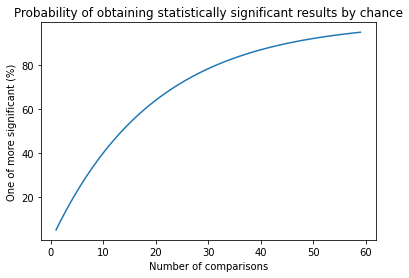

In [68]:
x = np.arange(1, 60)
ax = sns.lineplot(x, 100*(1 - .95**x))
ax.set_title("Probability of obtaining statistically significant results by chance")
ax.set_xlabel("Number of comparisons")
ax.set_ylabel("One of more significant (%)");

### The Bonferroni correction

The simplest approach to achieving a familywise error rate is to divide the value of $\alpha$ by the number of comparisons $\alpha / \text{K}$. This ensures that if all the null hypotheses are true, there is about a 95% chance of seing no statistically significant results among all K comparisons and only a 5% chance of seeing one (or more) statistically significant results.

### Correction for multiple comparisons with the False Discovery Rate (FDR)

The FDR is the answer to these two equivalent questions:

- if a comparion is classified as a discovery (when its P value is lower than a certain threshold), what is the chance that H0 is true?
- of all discoveries, what fraction is expected to be False

When analyzing a set of P values one can control the FDR to a desired value abbreviated Q with: $$\text{Q}=\frac{\text{A}}{\text{A}+\text{C}}$$

With Q=10% the goal is for at least 90% of the discoveries to be true and no more than 10% to be false (for which H0 is actually true).

A method developped by Benjamini and Hochberg sets the threshold values for deciding when a P value is low enough to be deemed a discovery, with a different threshold value for each comparison. Imagine that we compute 100 P values and all H0 were true. We'd expect the P values to be randomly distributed between 0.0 and 1.0. It would not be surprising to for the smallest P value to equal 0.01, but it would be surprising for the median P value to be 0.01; we'd expect this value to be about 0.5. 10% of ranked P values would be less than 0.10 and so on.

Let's imaginewe are making 100 comparisons and Q=5%. If all H0 were true we'd expect that the smallest P value would be about 1/100. Multiply that value by Q, so we declare the smallest P value to be a discovery if its P value is less than 0.01 * 0.05 = 0.0005. For the 2nd-smallest P value, 1/200 * 5% = 0.001 and so on. The comparision with the largest P value is called a discovery only if its value is less than 0.05.

If we set Q for the FDR to equal $\alpha$ in the conventional method, for the smallest P value the threshold used for FDR is $\alpha / k$, which is the same threshold used by Bonferroni method. For the largest P value the threshold for the FDR method is $\alpha$.

Say differently, the total number of discoveries equals $\text{A}+\text{C}$, if we set Q to 5%, then we would expect the ratio $\frac{\text{A}}{\text{A}+\text{C}} > 5\%$ and the ratio $\frac{\text{C}}{\text{A}+\text{C}} > 95\%$ 

## Statistical power

The power of an experimental design answers this question: if the true effect is of a specified size and the experiment is repeated many time, what fraction of the results will be statistically singificant? This concept can help when deciding how large a sample size to use and can help to interpret results that are not statistically singificant.

The definition of a P value begins with "if the null hypothesis is true...", but what if H0 is false and the treatment really does affect the outcome? If there really were a difference, relative risk, correlation...what is the chance of obtaining an effect that is statistically singificant in one particular sample?

Power is the fraction of experiments in which you would expect to find a statistically singificant result assuming that H0 is not true: $$1 - \beta = \frac{\text{C}}{\text{C}+\text{D}}$$

If H0 is true, $\alpha$ is the chance of making the wrong decision. Similarly, if H0 is false, $\beta$, i.e. 1 - power, is the chance of making the wrong decision.

In general, experiments with **high power** have **large sample size**, looking for **large effect** and with **little scatter**. With no expected effect, the power tends to be as small as 5% (the significance level), but increases with effect (sample size and SD constant) within a sigmoid curve, reaching 100% at maximum theoritically.

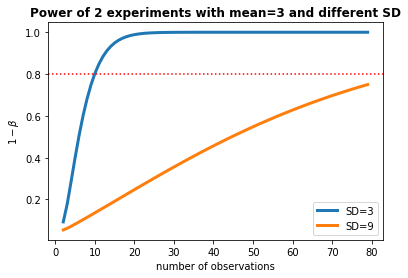

In [59]:
from statsmodels.stats.power import TTestPower

mean_diff = 3

powers_3 = [
    TTestPower().power(effect_size=mean_diff/3, alpha=0.05, nobs=n) for n in range(80)
]
powers_9 = [
    TTestPower().power(effect_size=mean_diff/9, alpha=0.05, nobs=n) for n in range(80)
]

plt.plot(powers_3, label='SD=3',  lw=3)
plt.plot(powers_10, label='SD=9',lw=3)
plt.axhline(y=0.8, ls=':', c='red')
plt.xlabel("number of observations")
plt.ylabel(r"$1 - \beta$")
plt.title(f"Power of 2 experiments with mean={mean_diff} and different SD", fontdict={'weight': 'bold'})
plt.legend();

## Testing for equivalence or noninferiority

When testing a generic drug, the FDA defines two drug formulations to be (bio)equivalent when the ratio of their peak concentrations in blood plasma and the entire 90% CI of the ratio is between 0.80 and 1.25 (the reciprocal of 80% is 1/0.8=125%).

When 90% CI lie entirely within the equivalence zone, the drugs are equivalent to the  standard drug with which they are being compared.

When the 90% CI lie totally outside the equivalence zone, the drug is proved to be not equivalent.

When the 90% CI is partly within the equivalence zone and partly outside, the data are not conclusive.

When the lower limit of the 90% CI exceeds 80%, noninferiority is proved, i.e. the 90% CI is in a range that either shows the new drug is superior of shows that the new drug is slighlty inferior but still in the zone defined to be practically equivalent

![Defining superiority, equivalence and non-inferiority in clinical trials](https://www.researchgate.net/profile/James-Beeson/publication/258525159/figure/fig2/AS:267840339050505@1440869521913/Defining-superiority-equivalence-and-non-inferiority-in-clinical-trials-of_W640.jpg)

### Applying the usual approach of statistical hypothesis testing to testing for equivalence

The approach is to pose **two distinct null hypotheses and define statistical significance using two one-sided tests (TOST)**:
* the mean value of the ratio is greater than 0.80 and this increase is statistically significant with a one-sided P value less than 0.05
* the mean value of the ratio is less than 1.25 and this decrease is statistically significant with one-sided P value less than 0.05